<a href="https://colab.research.google.com/github/maimou94/Startup-case/blob/main/Startup_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Importation des librairies nécessaires à la visualisation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb
import plotly.express as px

,Company,Location,Salary
70,HR Team,Nice - 06,1049570.0
78,Tereos,Moussy-le-Vieux - 77,110947.0
66,Inetum,La Chapelle-sur-Erdre - 44,110947.0


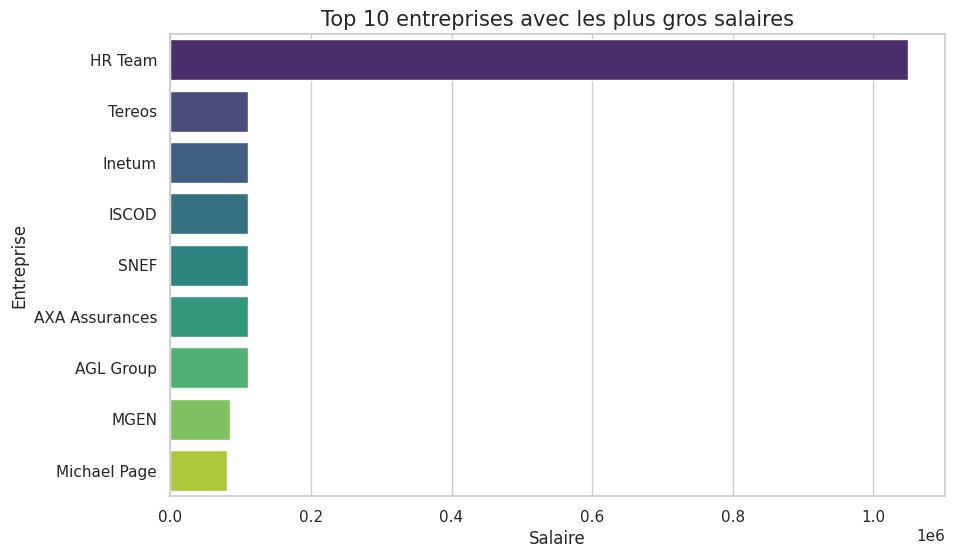

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/content/JobList50.xlsx - FinalDatasetJob.csv'
data = pd.read_csv(file_path)

# Tri des données par salaire en ordre décroissant
data['Salary'] = pd.to_numeric(data['Salary'], errors='coerce')

data_sorted = data.sort_values('Salary', ascending=False)

# Sélection des 10 premières entreprises pour une visualisation plus claire
data_top10 = data_sorted.head(10)

# Création du graphique en barres
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Salary', y='Company', data=data_top10, palette='viridis')

# Ajout de titres et labels
plt.title('Top 10 entreprises avec les plus gros salaires', fontsize=15)
plt.xlabel('Salaire')
plt.ylabel('Entreprise')
# Affichage du graphique plt.show()

data_top3 = data_top10[["Company","Location","Salary"]].head(3)
data_top3

In [121]:
# cLaasement des entreprises proposant les plus bas salaires

df_company_low = pd.read_csv("/content/entreprise avec les salaires les plus bas.csv")


df_company_low  = df_company_low.sort_values(by='salary', ascending=True).head(3)

# Création du bar plot vertical pour les salaires les plus bas
fig = px.bar(df_company_low, x='Company', y='salary', text='salary',color = 'Location',
             title='Top 3 des entreprises proposant les salaires les plus bas',
             labels={'Company': 'Company', 'salary': 'Salaire', 'Location': 'Location'},
             orientation='v',color_discrete_sequence=px.colors.qualitative.Set1)  # Graphique vertical

# Mise à jour des traces pour afficher le texte
fig.update_traces(texttemplate='%{text}', textposition='outside')

# Modification de la légende pour afficher les noms des régions
fig.update_layout(showlegend=True, legend_title_text='Location')

# Affichage du graphique
fig.show()

In [126]:
# Graphiques salaires moyens par région

df_contrat_par_region = pd.read_csv("/content/Salaire par contrats et regions.csv")

# Création du heatmap proportionnel
df_contrat_par_region = df_contrat_par_region.groupby('Location', as_index=False)['salary'].sum()
df_contrat_par_region=df_contrat_par_region.sort_values(by= 'salary', ascending=False).head(10)
fig1 = px.treemap(df_contrat_par_region, path=['Location'], values='salary',
                 title='Salaire moyen par région')

# Création du bar plot horizontal avec des étiquettes de valeur
fig = px.bar(df_contrat_par_region, x='salary', y='Location', orientation='h',
             title='Top 10 best annual salary per region',
             labels={'salary': 'Salary', 'Location': 'Location'},text='salary')
fig.update_traces(texttemplate='%{text:.2s}', textposition='inside')


#Affichage des visualisations
fig1.show()
fig.show()


In [119]:
# Salaire moyen par type de contrat

# Charger les données
df_type_contrat = pd.read_csv("/content/JobList50.xlsx - FinalDatasetJob.csv")

# S'assurer que 'Salary' est de type numérique
df_type_contrat['Salary'] = pd.to_numeric(df_type_contrat['Salary'], errors='coerce')

# Groupement par contrat + et calcul de la moyenne des salaires
df_grouped = df_type_contrat.groupby('Contrat', as_index=False)['Salary'].mean()

# Création du graphique radial
fig1 = px.line_polar(df_grouped, r='Salary', theta='Contrat', line_close=True,
                    title='Salaire moyen par type de contrat',
                    labels={'Salary': 'Salaire Moyen', 'Contrat': 'Type de Contrat'},
                    color_discrete_sequence=['green'])


# Création du graphique en barres
fig2 = px.bar(df_grouped, x='Salary', y='Contrat',text= 'Salary',
                    title='Salaire moyen par type de contrat',
                    labels={'Salary': 'Salaire Moyen', 'Contrat': 'Type de Contrat'},
              color_discrete_sequence=['green'])

#Affichage des visualisations
fig1.show()
fig2.show()

In [104]:
#Les classements des Job CDI proposant les plus bas salaires (TOP 3)

df_job_low_wage = pd.read_csv("/content/Jobs cdi avec les salaire les plus bas.csv")

# Trie des données
df_job_low_wage = df_job_low_wage.sort_values(by='salary', ascending=True).head(3)

# Création du bar plot vertical pour les salaires les plus bas
fig = px.bar(df_job_low_wage, x='Job_Title', y='salary', text='salary',color = 'Location',
             title='Top 3 des jobs CDI avec les plus bas salaires',
             labels={'Job_Title': 'Nom de poste', 'salary': 'Salaire', 'Location': 'Location'},
             orientation='v')  # Graphique vertical

# Afficher le texte
fig.update_traces(texttemplate='%{text}', textposition='outside')

# Afficher les noms des régions
fig.update_layout(showlegend=True, legend_title_text='Location')

# Affichage du graphique
fig.show()


In [124]:
# TOP 3 des plus hauts salaires

df_job_high_wage = pd.read_csv("/content/Jobs avec les salaires les plus élévé.csv")


df_job_high_wage = df_job_low_wage.sort_values(by='salary', ascending=True).head(3)

# Création du bar plot vertical pour les salaires les plus bas
fig = px.bar(df_job_high_wage, x='Job_Title', y='salary', text='salary',color = 'Location',
             title='Top 3 des postes avec les salaire les plus élevés',
             labels={'Job_Title': 'Nom de poste', 'salary': 'Salaire', 'Location': 'Location'},
             orientation='v',color_discrete_sequence=px.colors.qualitative.Set3)  # Graphique vertical

# Afficher le texte
fig.update_traces(texttemplate='%{text}', textposition='outside')

# Afficher les noms des régions
fig.update_layout(showlegend=True, legend_title_text='Location')

# Affichage du graphique
fig.show()